# Final Project - Analisis Data World University Rankings
### Disusun oleh: Rafii Yainal Abidin

Analisis ini menggunakan dataset yang berisi tentang nama-nama universitas yang mendapatkan peringkat terbaik di dunia. Peringkat tersebut diukur dari berapa total score yang didapatkan. Dalam dataset tersebut juga terdapat beberapa variabel/tolak ukur yang dijadikan penilaian kenapa universitas tersebut layak menjadi universitas terbaik.

## Analisis World University Rankings

Project ini bertujuan untuk menganalisis serta melakukan prediksi bagaimana sebuah universitas itu bisa dinilai baik dan menduduki peringkat terbaik di dunia.

Sumber: https://www.kaggle.com/mylesoneill/world-university-rankings
(dengan bebeberapa penyesuaian)

Pertanyaan yang akan dijawab melalui analisis ini adalah:
1. Variabel apa yang berpengaruh paling besar terhadap peningkatan peringkat universitas berdasarkan data?
2. Model analisis regresi apa yang paling tepat digunakan?
3. Bisakah dilakukan clustering/clasification?
4. Prediksi apa yang bisa dilakukan setelah analisis?

# Preparing

### Import Library

Sebelum melakukan analisis serta menampilkan data, langkah pertama adalah memanggil library-library yang nanti akan digunakan.

In [15]:
import s3fs #for open file in s3
import pandas as pd #for dataframes
import matplotlib.pyplot as plt #for plotting graphs
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')
import numpy as np
import pylab as pl

### Import Data 

Setelah memanggil library yang dibutuhkan, selanjutnya adalah memanggil dataset. Dataset tersebut tersimpan dalam di bucket amazone S3 saya. Sehingga cara memanggilnya sebagai berikut.

In [3]:
s3 = s3fs.S3FileSystem()

s3.ls('bucketprojectdts')

['bucketprojectdts/timesData.csv',
 'bucketprojectdts/timesData2.csv',
 'bucketprojectdts/timesData3.csv']

In [4]:
with s3.open('bucketprojectdts/timesData3.csv', 'rb') as f:
    file = pd.read_csv(f)

In [5]:
file.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27%,45 : 55,2011


In [6]:
file.columns # mengetahui kolom pada data

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

### Melakukan Sorting Data

Untuk mempermudah analisa saya mencoba mengerucutkan data yang akan dianalisis, disini saya hanya menampilkan 100 universitas dengan ranking teratas.

In [7]:
data = file[:100]

### Membuat Data Frame

Setelah memilih dan melakukan sorting data, langkah selanjutnya adalah membuat dataframe. Disini saya hanya mengambil beberapa variabel saja, yaitu:

In [8]:
df = pd.DataFrame(data, columns = ['university_name', 'teaching',
                                   'research', 'num_students', 
                                   'student_staff_ratio','total_score'])

In [9]:
df.head()

,university_name,teaching,research,num_students,student_staff_ratio,total_score
0,Harvard University,99.7,98.7,20152.0,8.9,96.1
1,California Institute of Technology,97.7,98.0,2243.0,6.9,96.0
2,Massachusetts Institute of Technology,97.8,91.4,11074.0,9.0,95.6
3,Stanford University,98.3,98.1,15596.0,7.8,94.3
4,Princeton University,90.9,95.4,7929.0,8.4,94.2


In [10]:
df.dtypes # untuk mengetahui type data pada dataframe

university_name         object
teaching               float64
research               float64
num_students           float64
student_staff_ratio    float64
total_score            float64
dtype: object

### Pengecekan Nilai Null

Setelah dataframe selesai dibuat, langkah selanjutnya adalah mengecek apakah dalam dataframe terdapat data yang tidak ada nilainya/null. Caranya sebagai berikut:

In [11]:
df.isnull().sum() # untuk mengecek data yang bernilai null

university_name        0
teaching               0
research               0
num_students           3
student_staff_ratio    3
total_score            0
dtype: int64

Setelah dilakukan pengecekan ternyata didapati bahwa ada 2 buah kolom pada dataframe yang mempunyai value null masing-masing terdapat 3.

## Cleaning Data
### Menghilangkan Data Null

Langkah selanjutnya adalah melakukan cleaning data yang null. Karena disini hanya terdapat 6 data saja maka data yang berisi null saya hapus.

In [12]:
dat = df.dropna() # menghapus yang bernilai null

Setelah data yang bernilai null dihapus. Selanjutnya yaitu mengecek kembali apakah data sudah terhapus.

In [13]:
dat.isnull().sum() # untuk mengecek data yang bernilai null

university_name        0
teaching               0
research               0
num_students           0
student_staff_ratio    0
total_score            0
dtype: int64

In [14]:
dat.head()

,university_name,teaching,research,num_students,student_staff_ratio,total_score
0,Harvard University,99.7,98.7,20152.0,8.9,96.1
1,California Institute of Technology,97.7,98.0,2243.0,6.9,96.0
2,Massachusetts Institute of Technology,97.8,91.4,11074.0,9.0,95.6
3,Stanford University,98.3,98.1,15596.0,7.8,94.3
4,Princeton University,90.9,95.4,7929.0,8.4,94.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadee723320>,
      dtype=object)

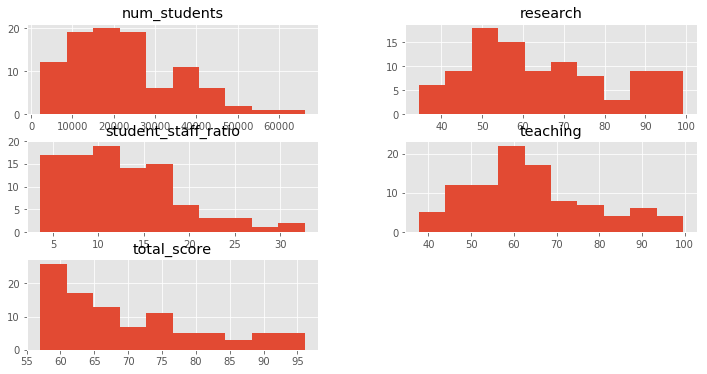

In [16]:
dat.hist()

## Analisis Data

### 1. Scatter Plot 1 (untuk masing-masing features)

Setelah membuat sebuah dataframe, langkah selanjutnya yaitu melakukan plotting terhadap semua features-features yang kemungkinan mempunyai korelasi. Untuk mempermudah membandingkan features yang diduga mempunyai korelasi satu sama lain disini saya menggunakan scatter matrix.

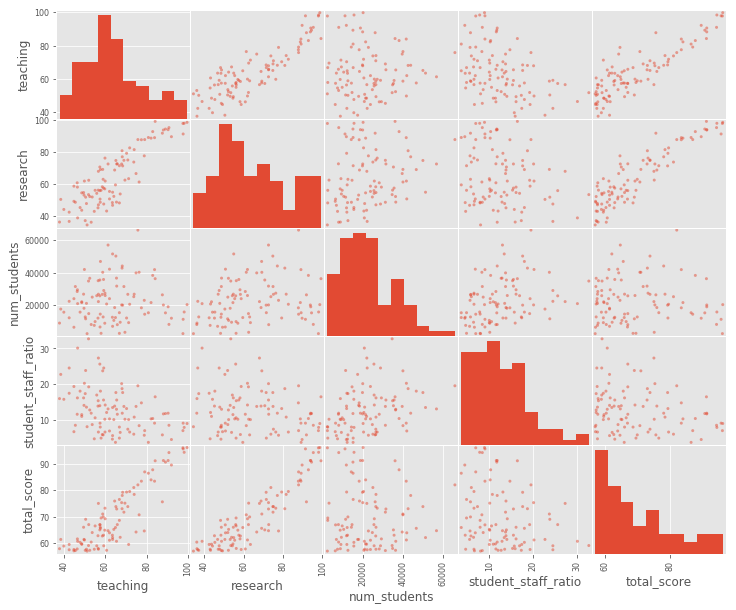

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(dat, figsize=(12,10))
plt.show()

Tujuan analisis ini adalah untuk mengetahui variabel apa yang paling berpengaruh terhadap peningkatan peringkat universitas. Peringkat universitas di dapat dari total score. Sehingga yang harus kita bandingkan adalah total score terhadap variabel lain.

In [18]:
dat.corr()

,teaching,research,num_students,student_staff_ratio,total_score
teaching,1.000000,0.862392,0.014333,-0.405093,0.877946
research,0.862392,1.000000,0.195702,-0.216166,0.908701
num_students,0.014333,0.195702,1.000000,0.319515,-0.026390
student_staff_ratio,-0.405093,-0.216166,0.319515,1.000000,-0.231568
total_score,0.877946,0.908701,-0.026390,-0.231568,1.000000


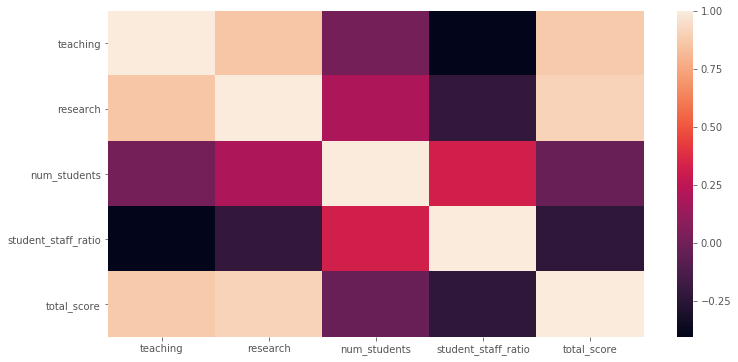

In [19]:
import seaborn as sns
sns.heatmap(dat.corr())

### 2. Scatter Plot 2 (Features yang memiliki dugaan kuat ada korelasi)

Berdasarkan gambar pada soal no 1, maka menurut saya dugaan 2 features yang memiliki korelasi kuat satu sama lain yaitu:

Teaching => university score for teaching (the learning environment) => Penilaian lingkungan belajar mengajar

Total score

#### Teaching terhadap Total Score

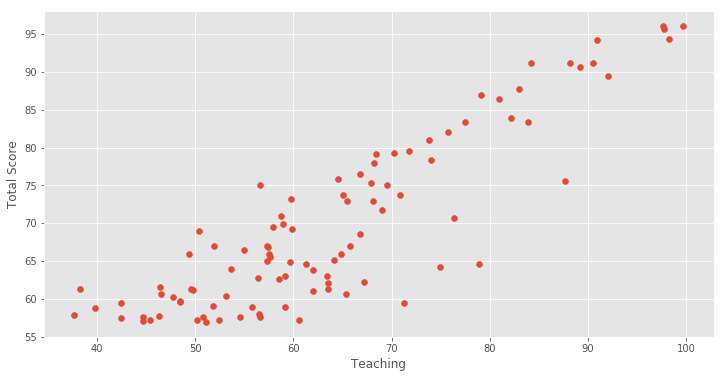

In [20]:
plt.scatter(dat['teaching'], dat['total_score'])
plt.xlabel('Teaching')
plt.ylabel('Total Score')
plt.xlim
plt.ylim
plt.show()

### 3. Statistik deskriptif dari beberapa 2 features yang dipilih. 

Melakukan operasi statistik deskriptif terhadap features yang dipilih.

In [21]:
max1 = np.max(dat['teaching'])
min1 = np.min(dat['teaching'])
mean1 = dat['teaching'].mean()
std1 = dat['teaching'].std()

max2 = np.max(dat['total_score'])
min2 = np.min(dat['total_score'])
mean2 = dat['total_score'].mean()
std2 = dat['total_score'].std()

#### a. Teaching

In [22]:
print('-------------------------------TEACHING---------------------------')
print('Nilai teaching terbesar yang didapatkan adalah',max1)
print('Nilai teaching terkecil yang didapatkan adalah',min1)
print('Rata-rata nilai teaching untuk semua universitas adalah',mean1)
print('Standar deviasi nilai teaching adalah',std1)

-------------------------------TEACHING---------------------------
Nilai teaching terbesar yang didapatkan adalah 99.7
Nilai teaching terkecil yang didapatkan adalah 37.7
Rata-rata nilai teaching untuk semua universitas adalah 63.79587628865981
Standar deviasi nilai teaching adalah 14.671606063568364


#### b. Total Score

In [23]:
print('------------------------TOTAL SCORE-------------------------')
print('Total skor terbesar yang didapatkan adalah',max2)
print('Total skor terkecil yang didapatkan adalah',min2)
print('Rata-rata total skor yang didapatkan adalah',mean2)
print('Standar deviasi total skornya adalah',std2)

------------------------TOTAL SCORE-------------------------
Total skor terbesar yang didapatkan adalah 96.1
Total skor terkecil yang didapatkan adalah 57.0
Rata-rata total skor yang didapatkan adalah 69.6742268041237
Standar deviasi total skornya adalah 11.298702712687447


In [24]:
dat[['teaching','total_score']].describe()

,teaching,total_score
count,97.000000,97.000000
mean,63.795876,69.674227
std,14.671606,11.298703
min,37.700000,57.000000
25%,53.100000,60.700000
50%,61.300000,66.000000
75%,71.300000,75.900000
max,99.700000,96.100000


### 4. Analisis 1 (Analisis Model NonLinear Regresi).

Setelah memilih 2 variabel yang diduga mempunyai korelasi kuat. Langkah selanjutnya yaitu melakukan analisis model. Berdasarkan pola persebaran data, maka menurut saya model yang tepat untuk digunakan sebagai analisis adalah model NonLinear regresi. Sebab data-data tersebut tidak terlalu linear dan masih terdapat banyak pencilan. Sehingga perkiraan model yang tepat menurut saya adalah Model Eksponensial atau Model Polinomial.

#### Preparation

In [25]:
cdf = dat[['teaching','total_score']]
cdf.head(5)

,teaching,total_score
0,99.7,96.1
1,97.7,96.0
2,97.8,95.6
3,98.3,94.3
4,90.9,94.2


#### Model NonLinear Regresi (Nilai Teaching terhadap Total Score)

Analisis ini bertujuan untuk mengetahui pengaruh nilai teaching terhadap total score. Serta melakukan prediksi berapa nilai teaching (X) yang harus diperoleh supaya mendapatkan nilai total score sebesar Y (misalnya).

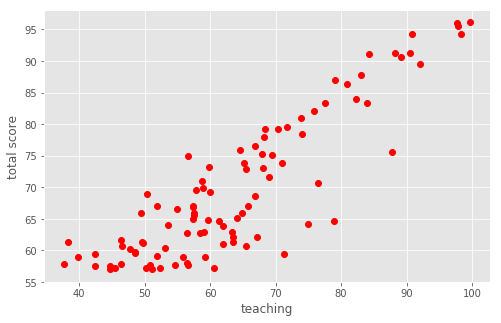

In [26]:
# x_data, y_data (teaching, total_score)

plt.figure(figsize=(8,5))
x_data, y_data = (dat['teaching'].values, dat['total_score'].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel('teaching')
plt.ylabel('total score')
plt.show()

In [27]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

def eksponensial(x, Beta_1, Beta_2):
    y=Beta_1*np.exp(Beta_2*x)
    return y

def poli(x,Beta_1,Beta_2,Beta_3,Beta_4):
    y=Beta_1+Beta_2*x+Beta_3*(x**2)+Beta_4*(x**3)
    return y

In [28]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [29]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(poli, xdata, ydata,maxfev = 10000)
popt1, pcov1 = curve_fit(eksponensial, xdata, ydata,maxfev = 10000)
popt2, pcov2 = curve_fit(sigmoid, xdata, ydata,maxfev = 1000)
#print the final parameters
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 1.138346, beta_2 = -2.873832


### Visualisasi Model

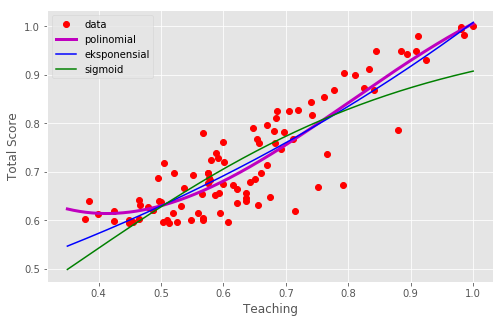

In [30]:
x = np.linspace(70, 200, 1000)
x = x/max(x)
plt.figure(figsize=(8,5))

y = poli(x, *popt)
y1 = eksponensial(x, *popt1)
y2 = sigmoid(x, *popt2)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y,'m', linewidth=3.0, label='polinomial')
plt.plot(x,y1, 'b', label='eksponensial')
plt.plot(x,y2,'g', label='sigmoid')
plt.legend(loc='best')
plt.ylabel('Total Score')
plt.xlabel('Teaching')
plt.show()

### Memeriksa Keakuratan Model

In [35]:
# split data into train/test
msk = np.random.rand(len(dat)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)
popt1, pcov1 = curve_fit(poli, train_x, train_y,maxfev=10000)
popt2, pcov2 = curve_fit(eksponensial, train_x, train_y,maxfev=10000)

# predict using test set
y_hat = sigmoid(test_x, *popt)
y_hat1 = poli(test_x, *popt1)
y_hat2 = eksponensial(test_x, *popt2)

# evaluation
print ("Sigmoid")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )
print('----------------------------------------')
print('')
print ("Polinomial")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat1 , test_y) )
print('----------------------------------------')
print('')
print('Eksponensial')
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat2 , test_y) )

Sigmoid
Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.44
----------------------------------------

Polinomial
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.80
----------------------------------------

Eksponensial
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.78


Berdasarkan hasil training dan testing di atas, dan dengan melihat hasil penghitungan MAE, MSE dan R2 dapat dilihat bahwa model yang paling layak untuk diterapkan adalah model non-linear polinomial. Sebab pada model polinomial nilai rata – rata kesalahan (error) absolut (MSE) antara hasil peramalan dengan nilai sebenarnya lebih kecil jika dibandingkan dengan model lain serta nilai R2-score lebih besar daripada model lain.

### 5. Analisis 2 (Clustering)

Sebelum melakukan clustering langkah pertama adalah melakukan impor terhadap library yang nantinya akan digunakan.

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt1
plt1.rcParams['figure.figsize'] = (12, 5)
plt1.style.use('ggplot')

### Preparing Data 

In [37]:
dat.head()

,university_name,teaching,research,num_students,student_staff_ratio,total_score
0,Harvard University,99.7,98.7,20152.0,8.9,96.1
1,California Institute of Technology,97.7,98.0,2243.0,6.9,96.0
2,Massachusetts Institute of Technology,97.8,91.4,11074.0,9.0,95.6
3,Stanford University,98.3,98.1,15596.0,7.8,94.3
4,Princeton University,90.9,95.4,7929.0,8.4,94.2


### Clustering Variabel Teaching terhadap Total Score 

In [38]:
teaching_x = dat[['teaching','total_score']]
teaching_x.head()

,teaching,total_score
0,99.7,96.1
1,97.7,96.0
2,97.8,95.6
3,98.3,94.3
4,90.9,94.2


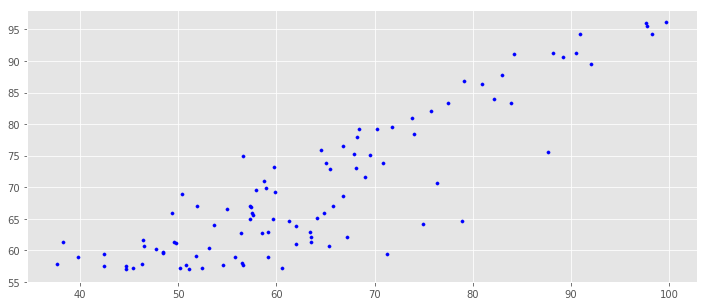

In [67]:
plt.scatter(teaching_x.teaching, teaching_x.total_score, s=10, c="b", marker="o", alpha = 1)
plt.show()

In [39]:
x_array = np.array(teaching_x) # mengubah variabel dataframe menjadi array

Setelah variabel diubah ke dalam array langkah selanjutnya adalah menstandarkan kembali ukuran variabel. Supaya data dapat kembali seperti jenis semula.

In [40]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

Menentukan nilai K (n_cluster), saya memilih menentukan nilai K sebesar 3 cluster.

In [41]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled) # menentukan cluster dari data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [42]:
print(kmeans.cluster_centers_) # nilai centroid

[[0.25924318 0.10972851]
 [0.49137931 0.42049563]
 [0.81854839 0.84638747]]


In [43]:
print(kmeans.labels_)
teaching_x["kluster"] = kmeans.labels_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Visualisasi Cluster

<function matplotlib.pyplot.show(*args, **kw)>

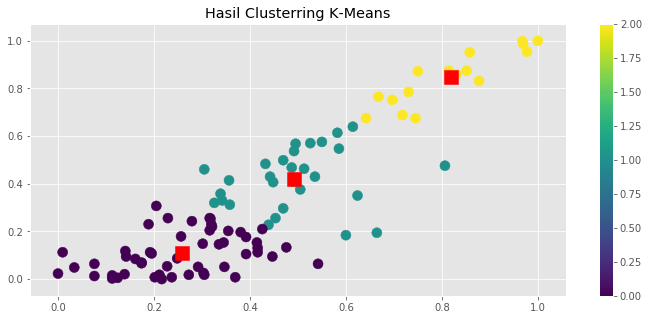

In [44]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = teaching_x.kluster, marker = "o", alpha = 1,)
centers = kmeans.cluster_centers_

plt1.scatter(centers[:,0],centers[:,1], c='red', s=200, alpha = 1, marker="s");
plt1.title("Hasil Clusterring K-Means")
plt1.colorbar(output)
plt1.show

Dari gambar di atas dapat kita lihat bahwa data telah tercluster menjadi 3.
1. Cluster berwarna ungu merupakan cluster kelas terbawah
2. Cluster berwarna cyan merupakan cluster kelas menengah
2. Cluster berwarna kuning merupakan cluster kelas teratas

# Kesimpulan 

### a. Hasil analisis

Peringkat sebuah universitas dilihat berdasarkan total score yang didapat oleh universitas tersebut. 
Berdasarkan hasil analisis di atas maka dapat disimpulkan bahwa:
1. Variabel yang mempunyai paling berpengaruh terhdapat peningkatan peringkat universitas adalah teaching dan reseacrh. Sebab teaching serta research mempunyai korelasi yang kuat dengan  total score.
2. Model analisis regresi yang paling tepat digunakan dalam analisis 2 variabel yang berkorelasi tersebut adalah model analisis NonLinear Polinomial.
3. Data tersebut dapat diclustering menjadi 3 cluster

### b. Prediksi 

Dengan melihat korelasi yang kuat antara nilai teaching, research dan total score. Menurut saya, bisa digunakan untuk melakukan prediksi. Misalnya ketika sebuah universitas ingin mendapatkan peringkat yang lebih baik dari yang di dapat sekarang maka seharusnya mereka terlebih dahulu mengupayakan supaya nilai teaching dan researchnya semakin tinggi karena 2 variabel tersebut mempunyai korelasi yang kuat dibandingkan dengan variabel lain.